# Project: Investigate Gapminder Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project explores gapminder dataset to find what parameters affect a country's public peace/security.  
Below are the questions aimed to be answered based on the analysis.
>
>* Q1: What is the relationship between a country's wealth inequality and its murder rate?
* Q2: What about suicide rate?
* Q3: Any other parameters linked to murder/suicide rate?


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> * Loading and taking a look on the data.
* Combining data if necessary
* Making sure each dataframe have similar foramt and are easy to joint together

The following dataset are used:
* Murder rate (male/female)
* Suicide rate (male/female)
* Gini index
* Unemployment rate
* GDP per capita

### 1. Help functions

There seem to be many simular operations on different dataset.  
Define functions here that would later help reduce duplicate code.


In [2]:
def data_for_certain_year(dataframe, year, isDrop=True):
    """
    Extract data of the specified year.
    
    [Args]
      dataframe: target dataframe
      year: the year of the data
      isDrop: whether to drop NaN
      
    [Return]
      A pandas series for the year's data
    """

    # Extract the data
    s_result = dataframe[year]
    # Drop NaN
    s_result.dropna(inplace=isDrop)
    
    # Rename the series name
    s_result.name = dataframe.index.name
    s_result.index.name = ''
    
    return s_result

### 2. Data for murder and suicide
Load the murder and suicide data.  
Check data integrity and decide how to process the data for later exploration.

In [3]:
# Load data about suicide and murder rate
df_suicide_f = pd.read_excel('data/Suicide female indicator file UL 20100916.xlsx', sheetname='Data', index_col=0)
df_suicide_m = pd.read_excel('data/Suicide male indicator file UL 20100916.xlsx', sheetname='Data', index_col=0)
df_murder_f = pd.read_excel('data/murdered female indicator file UL 20100916.xlsx', sheetname='Data', index_col=0)
df_murder_m = pd.read_excel('data/murdered male indicator file UL 20100916.xlsx', sheetname='Data', index_col=0)

In [4]:
# These are similar data, check how they look like
df_suicide_m.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
"Suicide among men, per 100 000, age adjusted",,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884804
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.330574
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.145025
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.048293
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.472977


In [5]:
# It seems there are more data for 2004
# Let's just focus on 2004 data
df_suicide_m.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
"Suicide among men, per 100 000, age adjusted",,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884804
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.330574
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.145025
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.048293
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.472977


In [6]:
# Combine suicide numbers for male and female
# Focus on 2004 data
df_suicide = df_suicide_f + df_suicide_m
df_suicide.index.name = 'Suicide per 100,000, age adjusted'
s_suicide_2004 = data_for_certain_year(df_suicide, 2004)

# Take a look on the data
s_suicide_2004.head()


Afghanistan    13.514959
Albania        15.391449
Algeria         9.745790
Andorra        10.951090
Angola         29.616796
Name: Suicide per 100,000, age adjusted, dtype: float64

In [7]:
# Combine murder numbers for male and female
df_murder = df_murder_f + df_murder_m
df_murder.index.name = 'Murdered per 100,000, age adjusted'
s_murder_2004 = data_for_certain_year(df_murder, 2004)

# Take a look on the data
s_murder_2004.head()


Afghanistan     7.429596
Albania        13.489231
Algeria        19.721519
Andorra         1.452563
Angola         98.177108
Name: Murdered per 100,000, age adjusted, dtype: float64

### 3. Data regarding inequality : Gini coefficient
Wealth Inequaliy can modeled by either income distribution or Gini coefficient.  
For simpliciy, only Gini coefficient are used in this analysis

In [8]:
# Load and modify data of Gini coefficient, which is used as a gauge of economic inequality
df_gini = pd.read_excel('data/indicator SI_POV_GINI.xls.xlsx', sheetname='Data', index_col=0)
s_gini_2004 = data_for_certain_year(df_gini, '2004')

# Take a look on the data
s_gini_2004.head()


Albania                   31.09
Argentina                 50.18
Armenia                   37.79
Belarus                   26.22
Bosnia and Herzegovina    35.78
Name: GINI index, dtype: float64

### 3. General data: GDP, and unemployment rate
These data are for used to investigate whether there are any factors that affect public peace other than wealth inequality.

In [9]:
# Load and modify GDP per captita data
df_GDP_capita = pd.read_excel('data/GDPpercapitaconstant2000US.xlsx', sheetname='Data', index_col=0)
s_GDP_capita_2004 = data_for_certain_year(df_GDP_capita, '2004')

# Take a look at the data
s_GDP_capita_2004.head()


Albania                 1454.022854
Algeria                 2043.135713
Andorra                20254.346287
Angola                   353.231466
Antigua and Barbuda    10599.284668
Name: Income per person (fixed 2000 US$), dtype: float64

In [10]:
# Load and modify unemployement rate data
df_unemployment = pd.read_excel('data/indicator_t above 15 unemploy.xlsx', sheetname='Data', index_col=0)
s_unemployment_2004 = data_for_certain_year(df_unemployment, 2004)

# Take a look at the data
s_unemployment_2004.head()


Australia     5.5
Canada        7.2
Czech Rep.    8.3
Estonia       9.5
Finland       8.8
Name: Total 15+ unemployment (%), dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> Since all the indicators are from different excel files thus imported as separate dataframe/series. It would be easier to examine the relationships of the indicators by combining the data at hands. In the following sections, I will examine the questions posted in the beginning of this notebook, and combine the dataframe only when necessary.


### Q1: Is wealth inequality has impact on a country's murder rate?

To find out the answers, let's combine the `s_murder_2004` with other indicators such as `s_gini_2004`.

In [11]:
# Combine s_murder_2004 and s_gini_2004 into a single dataframe
# Transpose it so that the indicators appears in columns
df_q1 = pd.DataFrame([s_murder_2004, s_gini_2004]).T

In [12]:
# Drop NaN rows
df_q1.dropna(inplace=True)

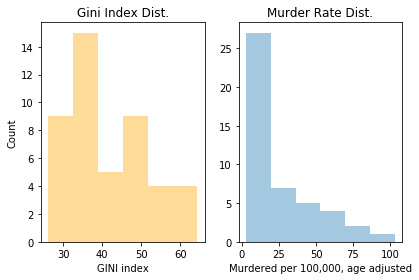

In [14]:
# Inspect the distributions
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.distplot(df_q1[s_gini_2004.name], kde=False, ax=axes[0], color='orange');axes[0].set_title('Gini Index Dist.');axes[0].set_ylabel('Count');
sns.distplot(df_q1[s_murder_2004.name], kde=False, ax=axes[1]); axes[1].set_title('Murder Rate Dist.');
plt.tight_layout()

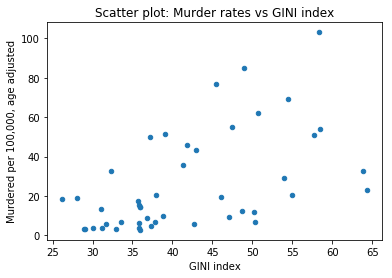

In [15]:
# Plot gini index vs murder rate
title_q1 = 'Scatter plot: Murder rates vs GINI index'
df_q1.plot(kind='scatter', x=s_gini_2004.name, y=s_murder_2004.name, title=title_q1)

Text(0.5,1,'Scatter plot with regression line: Murder rates vs GINI index')

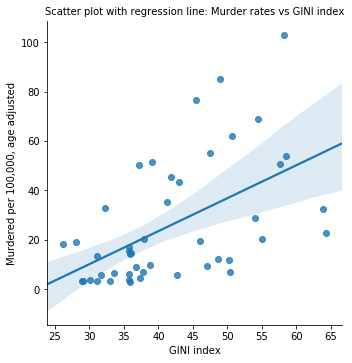

In [16]:
# Seaborn plot: scatter plot with regression line
sns_title_q1 = 'Scatter plot with regression line: Murder rates vs GINI index'
sns.lmplot(x=s_gini_2004.name, y=s_murder_2004.name, data=df_q1, fit_reg=True)
ax = plt.gca()
ax.set_title(sns_title_q1, fontdict={'fontsize': 10})

In [17]:
# Calculate Pearson correlation
df_q1.corr()

,"Murdered per 100,000, age adjusted",GINI index
"Murdered per 100,000, age adjusted",1.000000,0.537432
GINI index,0.537432,1.000000


#### Observation
* Histograms: The murder rate distribution among countries is right-skewed. A low murder rate is more typical in the available data.
* Scatter plots : The plots and the regression line show that there is a positive relationship (positive slope) between murder rate and Gini index.
* Correlation coefficient: Pandas's corr() function gives us positive Pearson coefficient between these two indicators as well.  


Clearly, wealth inequality has positive relationship with the murder rate among the countries in the dataset.

### Q2: What about suicide rate?

Similar to murder rate data, let's combine the `s_suicide_2004` with `s_gini_2004`.

In [18]:
# Combine s_suicide_2004 and s_gini_2004 into a single dataframe
# Transpose it so that the indicators appears in columns
df_q2 = pd.DataFrame([s_suicide_2004, s_gini_2004]).T

In [19]:
# Drop NaN rows
df_q2.dropna(inplace=True)

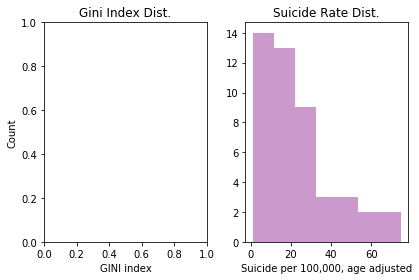

In [34]:
# Inspect the distributions
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.distplot(df_q2[s_gini_2004.name], hist=False, kde=False, ax=axes[0], color='orange'); axes[0].set_title('Gini Index Dist.');axes[0].set_ylabel('Count');
sns.distplot(df_q2[s_suicide_2004.name], kde=False, ax=axes[1], color='purple'); axes[1].set_title('Suicide Rate Dist.');
plt.tight_layout()

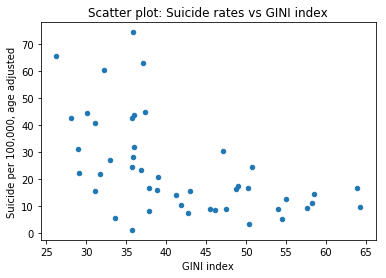

In [21]:
# Plot gini index vs suicide rate
title_q2 = 'Scatter plot: Suicide rates vs GINI index'
df_q2.plot(kind='scatter', x=s_gini_2004.name, y=s_suicide_2004.name, title=title_q2);

Text(0.5,1,'Scatter plot with regression line: Suicide rates vs GINI index')

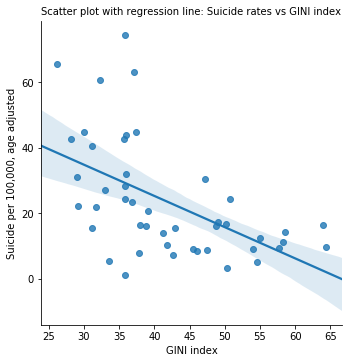

In [22]:
# Seaborn plot: scatter plot with regression line
sns_title_q2 = 'Scatter plot with regression line: Suicide rates vs GINI index'
sns.lmplot(x=s_gini_2004.name, y=s_suicide_2004.name, data=df_q2, fit_reg=True)
ax = plt.gca()
ax.set_title(sns_title_q2, fontdict={'fontsize': 10})

In [23]:
# Calculate Pearson correlation
df_q2.corr()

,"Suicide per 100,000, age adjusted",GINI index
"Suicide per 100,000, age adjusted",1.000000,-0.536617
GINI index,-0.536617,1.000000


#### Observation
* Histograms: The suicide rate distribution is also right-skewed. More countries have suicide rates lower than average.
* Scatter plots : The plots and the regression line show that there is a negative relationship (negative slope) between suicide rate and Gini index.
* Correlation coefficient: Pandas's corr() function gives us negative Pearson coefficient between these two indicators as well.  


The analysis shows that countries with lower wealth inequality tend to have higher suicide rates.

### Q3: Any other parameters linked to murder/suicide rate?

This time, let's examine the relationship between unemployment rate and suicide/murder rate.

#### Unemployment Rate

In [24]:
# Combine unemployment data with murder/suicide data
df_q3_1 = pd.DataFrame([s_unemployment_2004, s_suicide_2004, s_murder_2004]).T

In [25]:
# Drop NaN rows
df_q3_1.dropna(inplace=True)

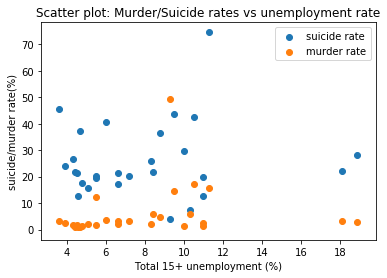

In [26]:
# Scatter plots of both suicide/murder rates with unemployment rate
plt.scatter(df_q3_1[s_unemployment_2004.name], df_q3_1[s_suicide_2004.name], label='suicide rate')
plt.scatter(df_q3_1[s_unemployment_2004.name], df_q3_1[s_murder_2004.name], label='murder rate')
plt.xlabel(s_unemployment_2004.name)
plt.ylabel('suicide/murder rate(%)')
plt.title('Scatter plot: Murder/Suicide rates vs unemployment rate')
plt.legend()

Text(0.5,1,'Scatter plot with regression line: Murder rates vs UNEF. rates')

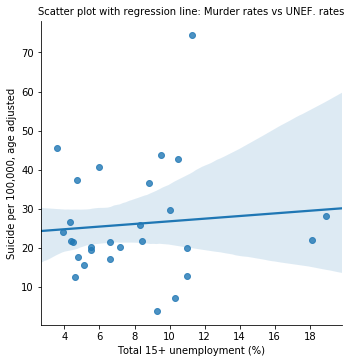

In [27]:
# Seaborn plot: unemployment rate vs suicide rate
sns_title_q3 = 'Scatter plot with regression line: Murder rates vs UNEF. rates'
sns.lmplot(x=s_unemployment_2004.name, y=s_suicide_2004.name, data=df_q3_1, fit_reg=True)
ax = plt.gca()
ax.set_title(sns_title_q3, fontdict={'fontsize': 10})

Text(0.5,1,'Scatter plot with regression line: Suicide rates vs UNEF. rates')

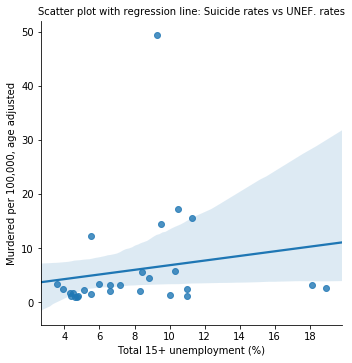

In [28]:
# Seaborn plot: unemployment rate vs murder rate
sns_title_q3 = 'Scatter plot with regression line: Suicide rates vs UNEF. rates'
sns.lmplot(x=s_unemployment_2004.name, y=s_murder_2004.name, data=df_q3_1, fit_reg=True)
ax = plt.gca()
ax.set_title(sns_title_q3, fontdict={'fontsize': 10})

In [29]:
# Calculate Pearson correlation
df_q3_1.corr()

,Total 15+ unemployment (%),"Suicide per 100,000, age adjusted","Murdered per 100,000, age adjusted"
Total 15+ unemployment (%),1.000000,0.091997,0.171745
"Suicide per 100,000, age adjusted",0.091997,1.000000,-0.002459
"Murdered per 100,000, age adjusted",0.171745,-0.002459,1.000000


#### Observation
* Scatter plots : There are very small positive relationship between unemployment rate and murder/suicide rate. The slope of the best fitting line are near 0.
* Correlation coefficient: Pandas's corr() function gives us very small positive Pearson coefficient between unemployment rate and murder/suicide rate.  


There might be a very small correlation between unemployment rate and suicide/murder rate but not apparent.

#### GDP per capita

In [30]:
# Combine GDP data with murder/suicide data
df_q3_2 = pd.DataFrame([s_GDP_capita_2004, s_suicide_2004, s_murder_2004]).T
df_q3_2.dropna(inplace=True)

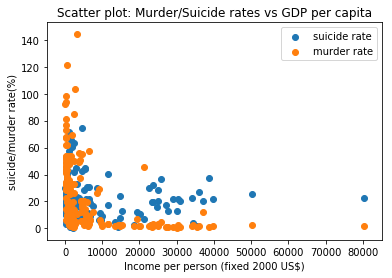

In [31]:
# Scatter plots of both suicide/murder rates with unemployment rate
plt.scatter(df_q3_2[s_GDP_capita_2004.name], df_q3_2[s_suicide_2004.name], label='suicide rate')
plt.scatter(df_q3_2[s_GDP_capita_2004.name], df_q3_2[s_murder_2004.name], label='murder rate')
plt.xlabel(s_GDP_capita_2004.name)
plt.ylabel('suicide/murder rate(%)')
plt.title('Scatter plot: Murder/Suicide rates vs GDP per capita')
plt.legend()

In [32]:
# Calculate Pearson correlation
df_q3_2.corr()

,Income per person (fixed 2000 US$),"Suicide per 100,000, age adjusted","Murdered per 100,000, age adjusted"
Income per person (fixed 2000 US$),1.000000,-0.027270,-0.387617
"Suicide per 100,000, age adjusted",-0.027270,1.000000,0.164673
"Murdered per 100,000, age adjusted",-0.387617,0.164673,1.000000


#### Observation
* Scatter plots : Both plots show that extreme high suicide/murder rates only exist in low GDP countries. Suicide/murder rates of higher-GDP countries show no apparent trend.
* Correlation coefficient: Pandas's corr() function gives us very small negative Pearson coefficient between suicide rate and GDP per capita, and siginificant negative Pearson coefficient between murder rate and GDP per capita.


Extreme murder/suicide rates are only found in low GDP countries.

<a id='conclusions'></a>
## Conclusions

> Through the explorations of 2004's data, the following relationships are observed. 
* The Gini coeffificients (a metric for inequality) has a positive relationship with murder rates but a negative relationship with suicide rate.
* Extreme high murder/suicide rates occurred only in low GDP countries.

> Limitations of this analysis
* Only one year's data (2004) are used to perform the analysis. The result might be different based on data of different time.
* There might be other factors that affect the murder/suicide rate of a country. (e.g. political factors)